In [3]:
# Importing all the necessary basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Reading data from the dataset
data = pd.read_csv(r'seeds.csv')
data.head()

Area  Perimeter  Compactness  Kernel.Length  Kernel.Width  \
0  15.26      14.84       0.8710          5.763         3.312   
1  14.88      14.57       0.8811          5.554         3.333   
2  14.29      14.09       0.9050          5.291         3.337   
3  13.84      13.94       0.8955          5.324         3.379   
4  16.14      14.99       0.9034          5.658         3.562   

   Asymmetry.Coeff  Kernel.Groove  Type  
0            2.221          5.220     1  
1            1.018          4.956     1  
2            2.699          4.825     1  
3            2.259          4.805     1  
4            1.355          5.175     1

In [5]:
# Checking for null values in the dataset
data.isnull().values.any()

False

In [6]:
# Checking the number of rows and columns of the dataset 
data.shape

(199, 8)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             199 non-null    float64
 1   Perimeter        199 non-null    float64
 2   Compactness      199 non-null    float64
 3   Kernel.Length    199 non-null    float64
 4   Kernel.Width     199 non-null    float64
 5   Asymmetry.Coeff  199 non-null    float64
 6   Kernel.Groove    199 non-null    float64
 7   Type             199 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


In [8]:
data.describe()

Area   Perimeter  Compactness  Kernel.Length  Kernel.Width  \
count  199.000000  199.000000   199.000000     199.000000    199.000000   
mean    14.918744   14.595829     0.870811       5.643151      3.265533   
std      2.919976    1.310445     0.023320       0.443593      0.378322   
min     10.590000   12.410000     0.808100       4.899000      2.630000   
25%     12.330000   13.470000     0.857100       5.267000      2.954500   
50%     14.430000   14.370000     0.873400       5.541000      3.245000   
75%     17.455000   15.805000     0.886800       6.002000      3.564500   
max     21.180000   17.250000     0.918300       6.675000      4.033000   

       Asymmetry.Coeff  Kernel.Groove        Type  
count       199.000000     199.000000  199.000000  
mean          3.699217       5.420653    1.994975  
std           1.471102       0.492718    0.813382  
min           0.765100       4.519000    1.000000  
25%           2.570000       5.046000    1.000000  
50%           3.631000       5.228000    2.000000  
75%           4.799000       5.879000    3.000000  
max           8.315000       6.550000    3.000000

<Figure size 576x576 with 0 Axes>

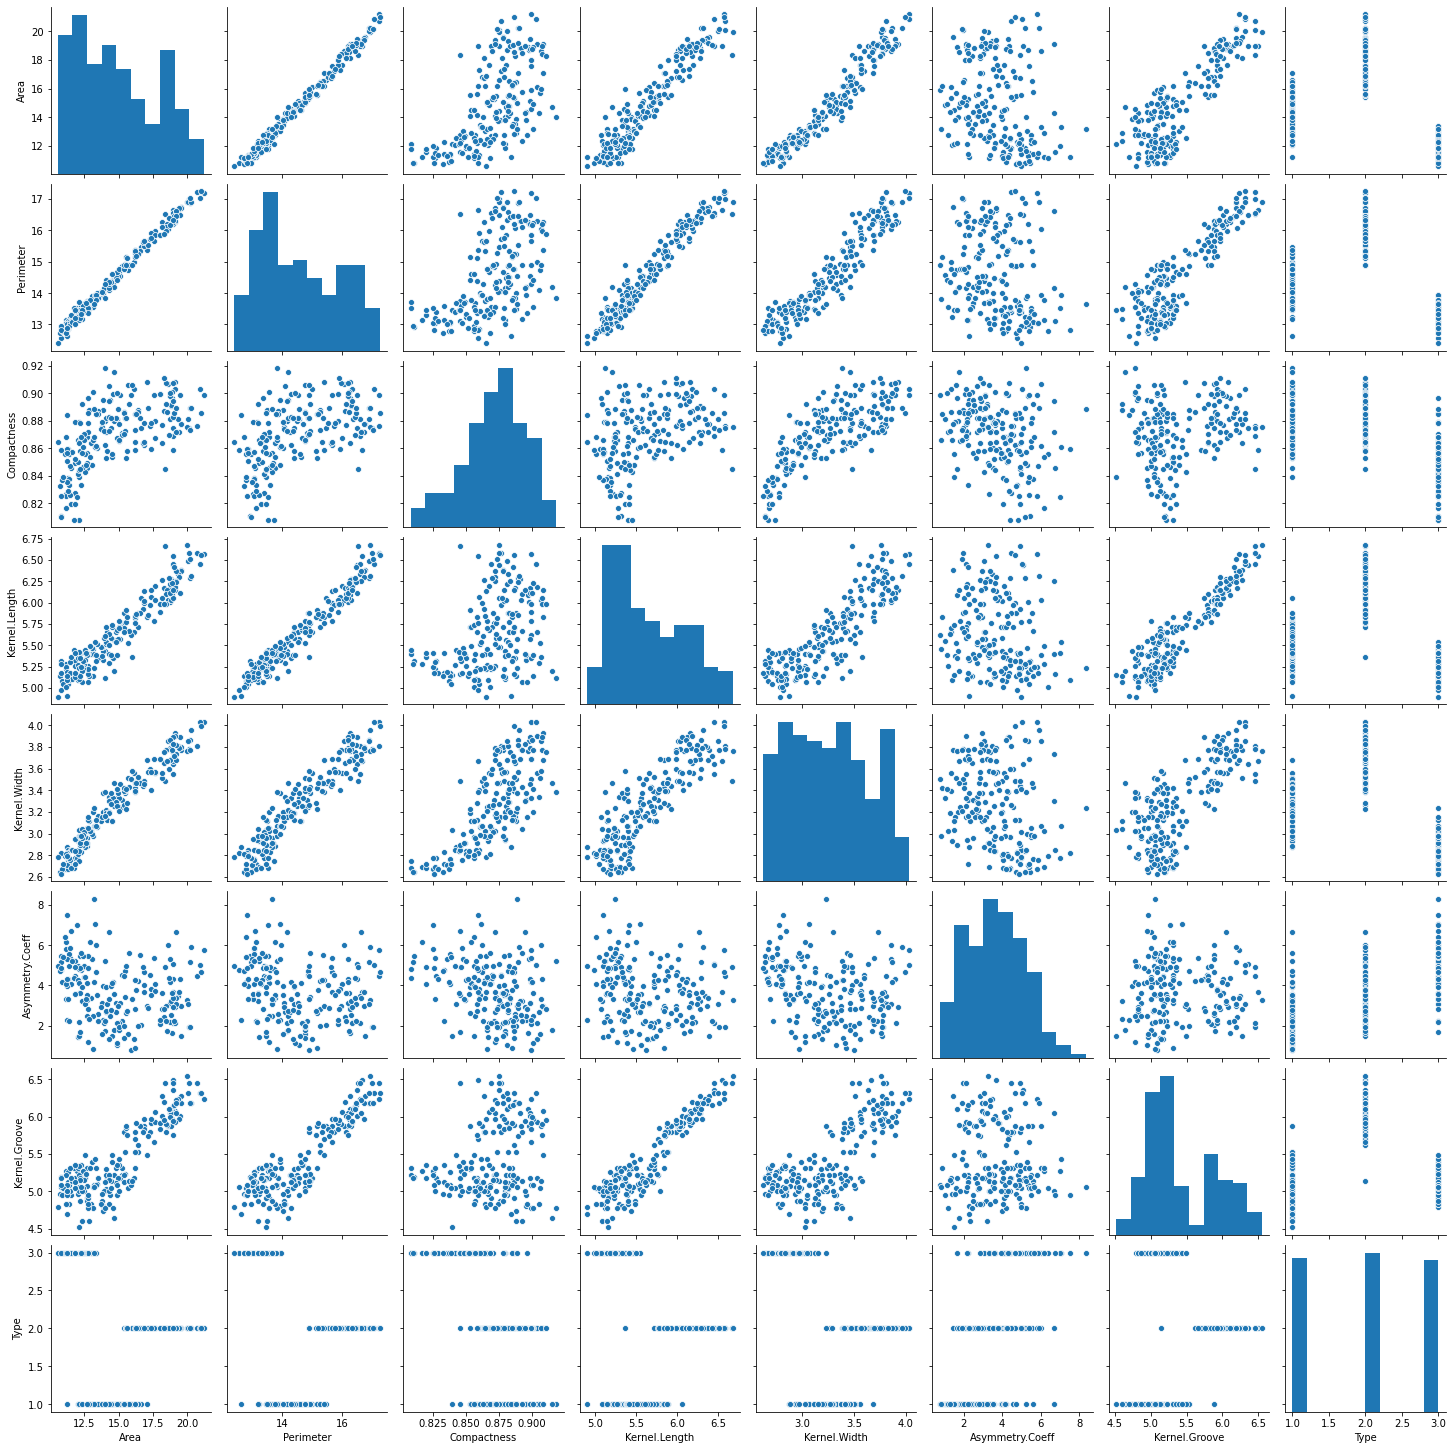

In [9]:
plt.figure(figsize=(8,8))
sns.pairplot(data)

<Figure size 576x576 with 0 Axes>

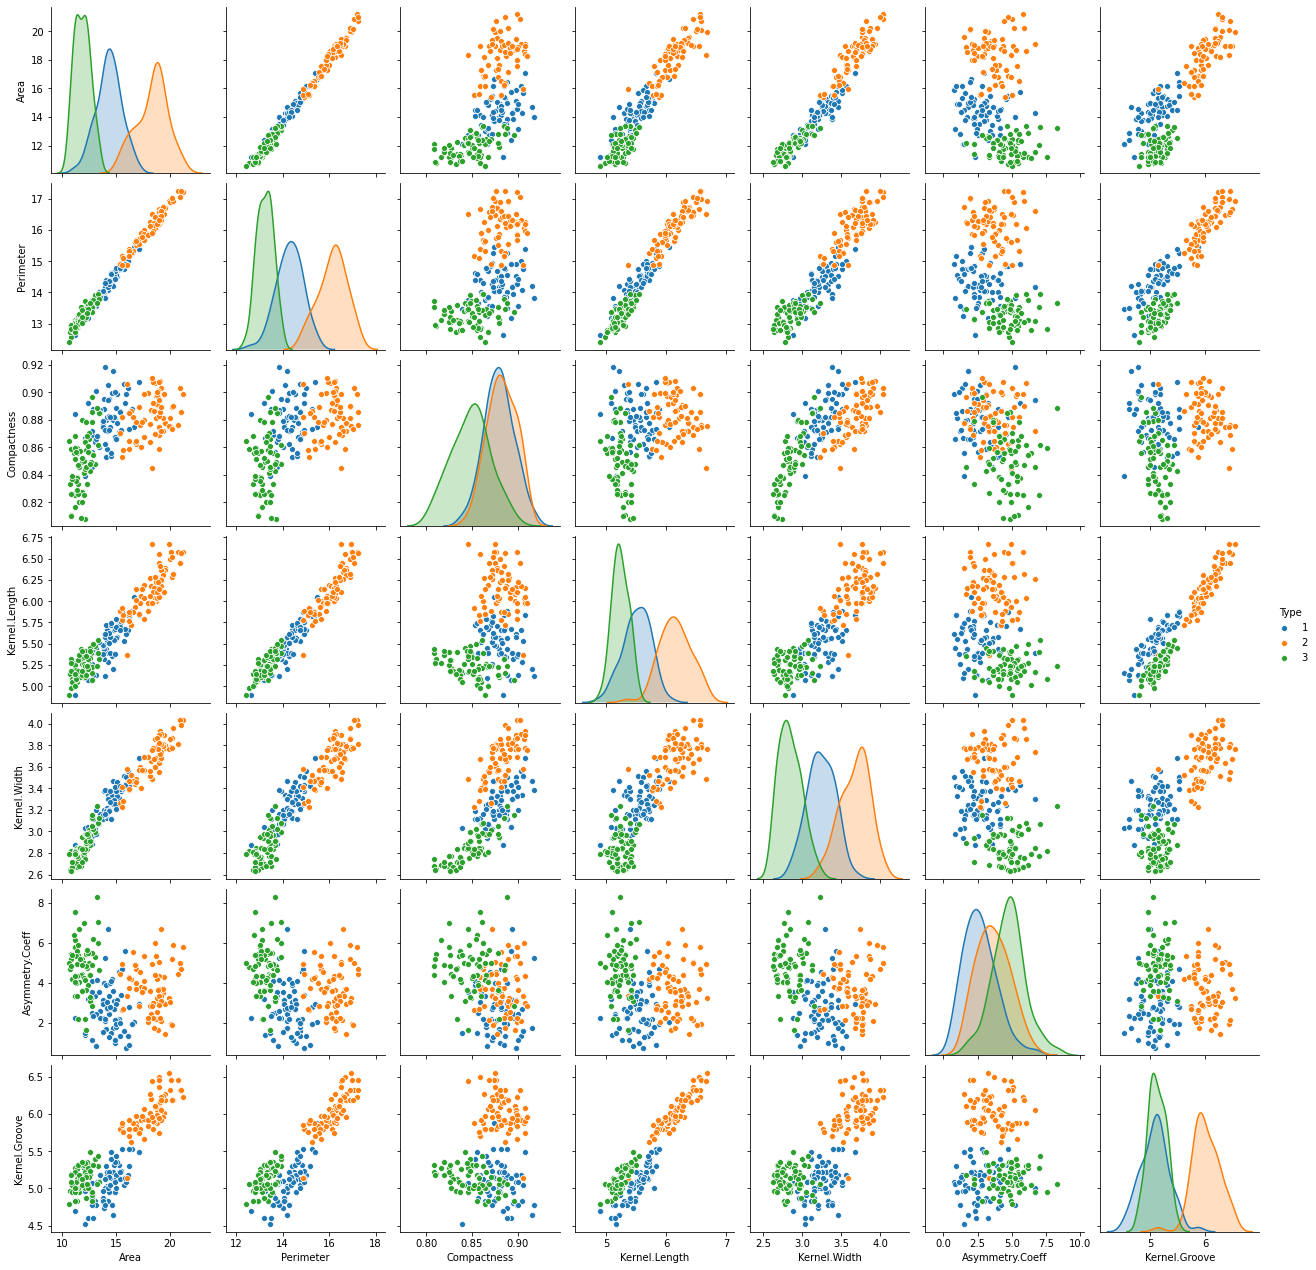

In [10]:
plt.figure(figsize=(8,8))
sns.pairplot(data,hue='Type')

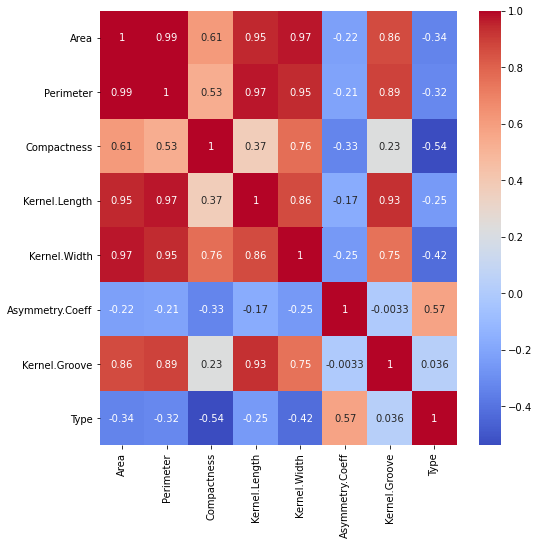

In [11]:
plt.figure(figsize=(8,8))
corr = data.corr()  # getting Correlation among the features of the dataset
sns.heatmap(corr, annot=True, cmap='coolwarm')
#plt.ylim(8,0)

In [12]:
a=data.groupby('Type').count()
a

Area  Perimeter  Compactness  Kernel.Length  Kernel.Width  \
Type                                                              
1       66         66           66             66            66   
2       68         68           68             68            68   
3       65         65           65             65            65   

      Asymmetry.Coeff  Kernel.Groove  
Type                                  
1                  66             66  
2                  68             68  
3                  65             65

In [13]:
# Standardize features by removing the mean and scaling to unit variance
# The standard score of a sample x is calculated as z = (x - u) / s
from sklearn.preprocessing import StandardScaler
ss= StandardScaler() 
data_new = ss.fit_transform(data)
data_new

array([[ 0.11716431,  0.18679667,  0.0081443 , ..., -1.00737062,
        -0.40826475, -1.22634124],
       [-0.01330197, -0.01975993,  0.44234139, ..., -1.82718718,
        -0.9454197 , -1.22634124],
       [-0.21586804, -0.38697165,  1.46979786, ..., -0.68162472,
        -1.21196249, -1.22634124],
       ...,
       [-0.59010028, -0.71593216,  0.75186803, ...,  3.14554887,
        -0.74195192,  1.23872853],
       [-1.05703224, -1.06019315, -0.80436312, ..., -0.06897709,
        -0.76636805,  1.23872853],
       [-0.89909937, -0.96073998, -0.10362921, ...,  1.32055406,
        -0.72770917,  1.23872853]])

In [14]:
x=data.drop(['Type'],axis=1)
y=data['Type']

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=None)

Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [17]:
model.fit(x_train,y_train)

LinearRegression()

In [18]:
print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(x, y)}')

NameError: name 'lin_reg' is not defined

In [19]:
y_pred = model.predict(x_test)
accuracy = model.score(x_test,y_test)
print(accuracy)

0.8037170991848508


<function matplotlib.pyplot.show(*args, **kw)>

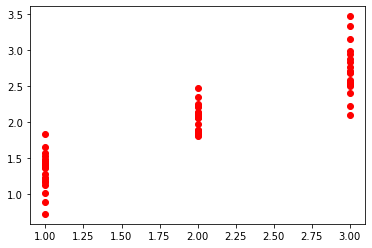

In [20]:
plt.scatter(y_test,y_pred, color='red')
plt.show

Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(fit_intercept=True,solver='lbfgs',multi_class='auto')
model.fit(x_train,y_train)

LogisticRegression()

In [22]:
y_test_pred=model.predict(x_test)
y_test_prob=model.predict_proba(x_test)
#print(y_test_prob)

[[1.24986599e-02 2.37184650e-03 9.85129494e-01]
 [2.71795938e-02 6.02625090e-05 9.72760144e-01]
 [5.49232672e-04 2.06089160e-06 9.99448706e-01]
 [9.21680587e-01 6.39404315e-04 7.76800089e-02]
 [9.27249756e-01 7.06625195e-02 2.08772406e-03]
 [2.86908305e-01 6.90120519e-01 2.29711761e-02]
 [3.66091480e-01 6.25851606e-01 8.05691405e-03]
 [4.54278775e-01 5.45156981e-01 5.64244353e-04]
 [9.32668053e-02 8.89272793e-03 8.97840467e-01]
 [5.33306683e-02 9.46667920e-01 1.41170535e-06]
 [1.57266796e-03 3.84625313e-06 9.98423486e-01]
 [4.64778475e-03 9.95352164e-01 5.15821324e-08]
 [5.76740998e-01 4.23087765e-01 1.71236641e-04]
 [9.09377243e-01 7.32090339e-02 1.74137226e-02]
 [8.81667025e-01 5.63208770e-02 6.20120980e-02]
 [2.38712784e-02 2.64117414e-05 9.76102310e-01]
 [4.76690498e-03 9.95232486e-01 6.08952174e-07]
 [9.62276540e-01 2.82233339e-02 9.50012619e-03]
 [9.32677380e-01 6.01199805e-02 7.20263944e-03]
 [4.20520773e-02 1.60995969e-04 9.57786927e-01]
 [3.22773499e-03 7.96321664e-07 9.967714

<function matplotlib.pyplot.show(*args, **kw)>

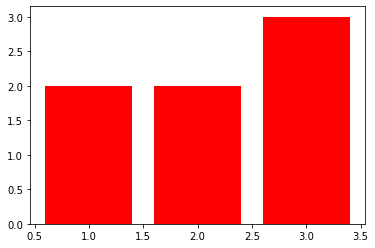

In [23]:
plt.bar(y_test,y_test_pred, color='red')
plt.show

In [24]:
predict = model.predict(x_train)

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve, classification_report

In [26]:
print(classification_report(y_train,predict))

precision    recall  f1-score   support

           1       0.91      0.87      0.89        46
           2       0.96      0.96      0.96        47
           3       0.92      0.96      0.94        46

    accuracy                           0.93       139
   macro avg       0.93      0.93      0.93       139
weighted avg       0.93      0.93      0.93       139



In [27]:
print(classification_report(y_test,model.predict(x_test)))

precision    recall  f1-score   support

           1       1.00      0.85      0.92        20
           2       0.88      1.00      0.93        21
           3       1.00      1.00      1.00        19

    accuracy                           0.95        60
   macro avg       0.96      0.95      0.95        60
weighted avg       0.96      0.95      0.95        60



Gaussian Classsifier

In [28]:
from sklearn.gaussian_process import GaussianProcessClassifier
model = GaussianProcessClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = model.score(x_test, y_test)
print(accuracy)

0.9166666666666666
